# Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # Natural Language tool kit

In [ ]:
from google.colab import files
up=files.upload()

Saving twitter.csv.zip to twitter.csv.zip


In [ ]:
# Load the data
data=pd.read_csv('twitter.csv.zip')
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
data.describe() # only numeric data

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
data['tweet']

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
31957,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
tweets_df=data
tweets_df


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

In [ ]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# Exploring Dataset

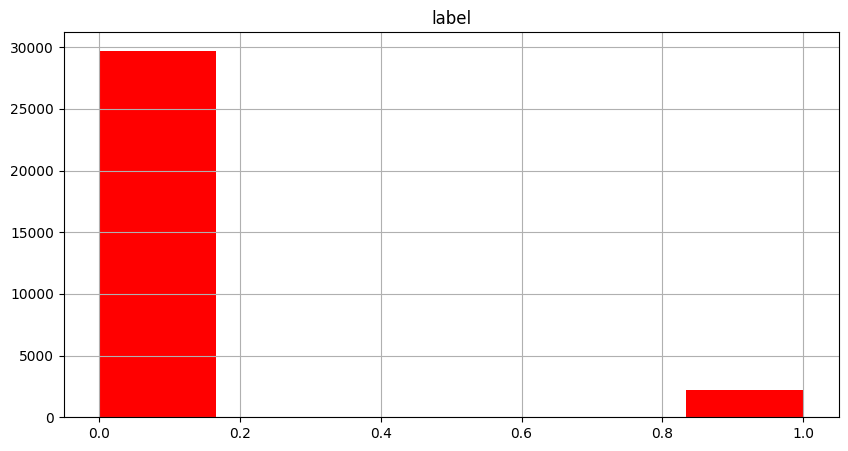

In [ ]:
#  your input will be divided into 6 intervals
tweets_df.hist(bins = 6, figsize = (10,5), color = 'r')
plt.show()

The apply() function can be used to apply any function to each element in a Pandas DataFrame

df['tweet'].apply(len) will apply the len() function to each element in the tweet column of the df DataFrame

In [ ]:
tweets_df.columns

Index(['label', 'tweet'], dtype='object')

In [ ]:
# Let's get the length of the messages
tweets_df['length']=tweets_df['tweet'].apply(len)


In [ ]:
tweets_df.columns

Index(['label', 'tweet', 'length'], dtype='object')

In [ ]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


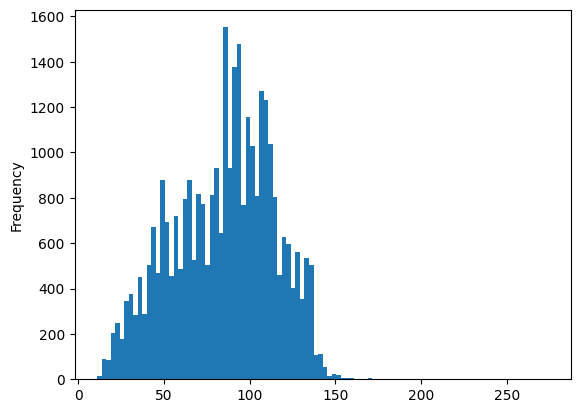

In [ ]:
# divide data into 100 intervals
tweets_df['length'].plot(bins=100, kind='hist')
plt.show()

In [ ]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


min length 11

max length 274

In [ ]:
# Let's see the shortest message - row
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [ ]:
# Let's see the message with max length
tweets_df[tweets_df['length'] == 274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [ ]:
# Let's see the message with mean length
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [ ]:
tweets_df[tweets_df['length'] == 100]['tweet'].iloc[0]

"product of the day: happy man #wine tool  who's   it's the #weekend? time to open up &amp; drink up!"

In [ ]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [ ]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [ ]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


imbalanced data set

output target ratio is less than 5%

# Perform Data Cleaning-I (Remove Punctuations)

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#sample
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'
Test_punc_removed=[char for char in Test if char not in string.punctuation]
# list of characters
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [ ]:
# Join the characters again to form the string.
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [ ]:
# another method
Test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)

# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# Perform Data Cleaning-II (Remove Stop Words)

In [ ]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# removing stop words
Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split()  if word.lower() not in stopwords.words('english')]

Test_punc_removed_join_clean # Only important (no so common) words are left

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [ ]:
sample = 'hello everyone, "i like music "..]]'

no_punc = [ char for char in sample  if char not in string.punctuation ]
text = ''.join(no_punc)
text = [  word for word in text.split() if word.lower() not in stopwords.words('english')  ]
text

['hello', 'everyone', 'like', 'music']

# Perform Count Vectorization

process of split words and represent it in the form of vector

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer= CountVectorizer()
X=vectorizer.fit_transform(sample_data)
X # 22 words

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [ ]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [ ]:
sample_data = ['is this the first one','This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer= CountVectorizer()
X=vectorizer.fit_transform(sample_data)
X=X.toarray()
df = pd.DataFrame(data=X,columns = vectorizer.get_feature_names_out())
print(df)


   and  document  first  is  one  paper  second  the  third  this
0    0         0      1   1    1      0       0    1      0     1
1    0         0      1   1    0      1       0    1      0     1
2    0         1      0   1    0      1       1    1      0     1
3    1         0      0   1    1      0       0    1      1     1
4    0         0      1   1    0      1       0    1      0     1


In [ ]:
text = ["Hello Ramya How are you","hello my name is Ramya","Hello my name is ramya"]
coun_vect = CountVectorizer(lowercase=False) # False
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
print(df)


   Hello  How  Ramya  are  hello  is  my  name  ramya  you
0      1    1      1    1      0   0   0     0      0    1
1      0    0      1    0      1   1   1     1      0    0
2      1    0      0    0      0   1   1     1      1    0


# Creating a Pipeline to Remove Punctuations, Stop words & Perform Tokenization

In [ ]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)
tweets_df_clean

,tweet
0,"[user, father, dysfunctional, selfish, drags, ..."
1,"[user, user, thanks, lyft, credit, cant, use, ..."
2,"[bihday, majesty]"
3,"[model, love, u, take, u, time, urð±, ðð..."
4,"[factsguide, society, motivation]"
...,...
31957,"[ate, user, isz, youuuðððððð..."
31958,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,"[listening, sad, songs, monday, morning, otw, ..."
31960,"[user, sikh, temple, vandalised, calgary, wso,..."


In [ ]:
tweets_df_clean.head()

,tweet
0,"[user, father, dysfunctional, selfish, drags, ..."
1,"[user, user, thanks, lyft, credit, cant, use, ..."
2,"[bihday, majesty]"
3,"[model, love, u, take, u, time, urð±, ðð..."
4,"[factsguide, society, motivation]"


In [ ]:
print(tweets_df['tweet'][0]) # show the original version

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run


In [ ]:
print(tweets_df_clean[0]) # show the cleaned up version

['user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']


In [ ]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [ ]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [ ]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
tweets_countvectorizer.shape

(31962, 47386)

In [ ]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())

X = tweets

X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = tweets_df['label']
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
31957,0
31958,0
31959,0
31960,1


# Working of Naive Bayes Theorem

In [ ]:
# Naive Bayes is a classification technique based on bayes theoram
# The theoram works on conditional Probability and Mathematics

# PRIOR PROBABILITY --> Probability of assuming before, performing the experiment.
# LIKLIHOOD PROBABILITY --> Probability of assuming while performing the experiment.
# POSTERIOR PROBABILITY --> Probability by combining both prior and liklihood probability.

# Formula of Naive Bayes Theoram:
#    P(A|B) = (P(B|A) * p(A)) / P(B)

# Training the Model

In [ ]:
print(X.shape)

(31962, 47386)


In [ ]:
print(y.shape)

(31962,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Assess the Model Performance using Confusion Matrix

In [ ]:
# Confusion Matrix --> Compares true value with predicted value

<Axes: >

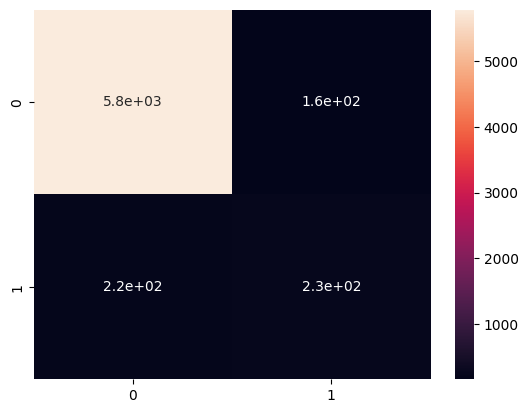

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicting the Test set results
#  to make predictions for the first 6393 samples in X_test
y_predict_test = NB_classifier.predict(X_test[0:6393])
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5940
           1       0.59      0.51      0.55       453

    accuracy                           0.94      6393
   macro avg       0.78      0.74      0.76      6393
weighted avg       0.94      0.94      0.94      6393



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,y_predict_test))

0.9402471453151885
